In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
import random
import importlib
import mpt_functions as mpt
importlib.reload(mpt)

<module 'mpt_functions' from 'd:\\Code\\GradProject-Bilge\\mpt_functions.py'>

In [14]:
path = "C:/Users/bilge/Downloads/MetroPT3(AirCompressor).csv"
df = mpt.get_the_data_and_convert_datetime(path)
df = mpt.drop_a_column(df, "Unnamed: 0")
df.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012,9.358,9.340,-0.024,9.358,53.600,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:00:10,-0.014,9.348,9.332,-0.022,9.348,53.675,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:00:19,-0.012,9.338,9.322,-0.022,9.338,53.600,0.0425,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:00:29,-0.012,9.328,9.312,-0.022,9.328,53.425,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:00:39,-0.012,9.318,9.302,-0.022,9.318,53.475,0.0400,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [15]:
df = mpt.aggregate_as_a_minute(df)
df

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses
0,2020-02-01 00:00:00,-0.012286,9.327429,9.311143,-0.022857,9.328000,53.521429,0.040357,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
1,2020-02-01 00:01:00,-0.013000,9.260000,9.243333,-0.023333,9.259667,53.420833,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
2,2020-02-01 00:02:00,-0.012667,9.198333,9.182000,-0.022333,9.199000,53.325000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
3,2020-02-01 00:03:00,-0.012333,9.136667,9.120667,-0.022667,9.136667,53.200000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
4,2020-02-01 00:04:00,-0.013000,9.075667,9.060000,-0.023000,9.075667,53.129167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306955,2020-09-01 03:55:00,-0.012000,9.247667,9.235000,-0.021000,9.249333,62.658333,0.045000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
306956,2020-09-01 03:56:00,-0.012667,9.158333,9.145333,-0.022000,9.160333,61.304167,0.044583,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
306957,2020-09-01 03:57:00,-0.011667,9.070667,9.056667,-0.021667,9.072333,60.620833,0.044583,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
306958,2020-09-01 03:58:00,-0.012000,8.982000,8.967667,-0.021333,8.984000,60.083333,0.044167,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0


In [16]:
# this should be checked

f1_start = "2020-04-18 00:00:00"
f1_finish = "2020-04-18 23:59:00"
f2_start = "2020-05-29 23:30:00"
f2_finish = "2020-05-30 06:00:00"
f3_start = "2020-06-05 10:00:00"
f3_finish = "2020-06-07 14:30:00"
f4_start = "2020-07-15 14:30:00"
f4_finish = "2020-07-15 19:00:00"

In [17]:
# # df2 is the new version of df1 with "condition" column added.

df2 = df.assign(condition=0)
df2.head()

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
0,2020-02-01 00:00:00,-0.012286,9.327429,9.311143,-0.022857,9.328000,53.521429,0.040357,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
1,2020-02-01 00:01:00,-0.013000,9.260000,9.243333,-0.023333,9.259667,53.420833,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
2,2020-02-01 00:02:00,-0.012667,9.198333,9.182000,-0.022333,9.199000,53.325000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
3,2020-02-01 00:03:00,-0.012333,9.136667,9.120667,-0.022667,9.136667,53.200000,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0
4,2020-02-01 00:04:00,-0.013000,9.075667,9.060000,-0.023000,9.075667,53.129167,0.040000,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


0    301707
1      5253
Name: condition, dtype: int64


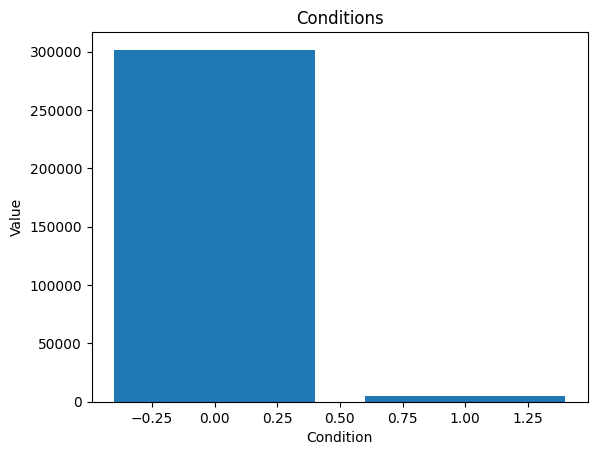

In [18]:
df2a = mpt.change_the_values_by_applying_a_time_filter(df2, f1_start, f1_finish, "condition", 1)
df2b = mpt.change_the_values_by_applying_a_time_filter(df2a, f2_start, f2_finish, "condition", 1)
df2c = mpt.change_the_values_by_applying_a_time_filter(df2b, f3_start, f3_finish, "condition", 1)
df2 = mpt.change_the_values_by_applying_a_time_filter(df2c, f4_start, f4_finish, "condition", 1)

print(df2["condition"].value_counts())


plt.bar([0, 1], df2["condition"].value_counts())
plt.title('Conditions')
plt.xlabel('Condition')
plt.ylabel('Value')
plt.show()

In [19]:
print(df2.isna().sum())  # Count NaN values
print((df2 == float('inf')).sum())  # Count positive infinity
print((df2 == float('-inf')).sum())  # Count negative infinity

timestamp              0
TP2                54240
TP3                54240
H1                 54240
DV_pressure        54240
Reservoirs         54240
Oil_temperature    54240
Motor_current      54240
COMP               54240
DV_eletric         54240
Towers             54240
MPG                54240
LPS                54240
Pressure_switch    54240
Oil_level          54240
Caudal_impulses    54240
condition              0
dtype: int64
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
condition          0
dtype: int64
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_

In [20]:
# Drop rows with NaN values
df2 = df2.dropna()

In [21]:
df_day1 = mpt.filter_a_day("2020-07-15",df2)
df_day1

,timestamp,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,condition
0,2020-07-15 00:00:00,-0.013000,9.412000,9.401000,-0.019000,9.413333,73.358333,3.724583,1.0,0.0,1.000000,1.0,0.000000,1.0,1.0,1.0,0
1,2020-07-15 00:01:00,-0.011667,9.029000,9.018333,-0.018333,9.031333,72.383333,3.704167,1.0,0.0,1.000000,1.0,0.000000,1.0,1.0,1.0,0
2,2020-07-15 00:02:00,-0.010333,8.716333,8.706000,-0.018667,8.719667,70.812500,3.705417,1.0,0.0,1.000000,1.0,0.000000,1.0,1.0,1.0,0
3,2020-07-15 00:03:00,-0.010667,8.397667,8.385667,-0.018333,8.400000,69.541667,3.665833,1.0,0.0,1.000000,1.0,0.000000,1.0,1.0,1.0,0
4,2020-07-15 00:04:00,3.999000,8.173333,4.059667,-0.018333,8.176000,68.170833,4.633333,0.5,0.5,0.833333,0.5,0.000000,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,2020-07-15 23:55:00,7.644000,7.439333,-0.018667,-0.014333,7.440000,70.583333,5.523333,0.0,1.0,0.333333,0.0,0.666667,1.0,0.0,1.0,0
1429,2020-07-15 23:56:00,9.015667,8.595333,-0.011000,-0.014333,8.592667,72.320833,5.795833,0.0,1.0,0.666667,0.0,0.000000,1.0,0.0,1.0,0
1430,2020-07-15 23:57:00,9.906667,9.524667,-0.009333,-0.014000,9.520333,74.041667,5.982917,0.0,1.0,0.333333,0.0,0.000000,1.0,0.0,1.0,0
1431,2020-07-15 23:58:00,5.217333,10.078000,5.029333,-0.013667,10.075667,75.083333,5.036250,0.5,0.5,0.666667,0.5,0.000000,1.0,0.0,1.0,0


In [22]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Select the variables to test for Granger causality with 'Condition' column
variables = ['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG', 'LPS', 'Pressure_switch', 'Oil_level', 'Caudal_impulses']

# Perform the Granger causality test for each variable with 'Condition' as the dependent variable
results = {}
for var in variables:
    test_result = grangercausalitytests(df2[['condition', var]], maxlag=5, verbose=True)  # maxlag depends on your dataset
    results[var] = test_result

# This will output whether each variable Granger-causes 'Condition' based on p-values.



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=19.9859 , p=0.0000  , df_denom=252716, df_num=1
ssr based chi2 test:   chi2=19.9861 , p=0.0000  , df=1
likelihood ratio test: chi2=19.9853 , p=0.0000  , df=1
parameter F test:         F=19.9859 , p=0.0000  , df_denom=252716, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=11.7828 , p=0.0000  , df_denom=252713, df_num=2
ssr based chi2 test:   chi2=23.5660 , p=0.0000  , df=2
likelihood ratio test: chi2=23.5649 , p=0.0000  , df=2
parameter F test:         F=11.7828 , p=0.0000  , df_denom=252713, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.2551 , p=0.0000  , df_denom=252710, df_num=3
ssr based chi2 test:   chi2=30.7662 , p=0.0000  , df=3
likelihood ratio test: chi2=30.7643 , p=0.0000  , df=3
parameter F test:         F=10.2551 , p=0.0000  , df_denom=252710, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=8.

In [23]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

def check_exogenous_granger(df, target_column, exogenous_columns, max_lag=5, significance_level=0.05):
    for column in exogenous_columns:
        if column in df.columns:
            # Perform Granger Causality test
            test_result = grangercausalitytests(df[[target_column, column]], max_lag, verbose=False)
            
            # Extract the p-values from the test results
            p_values = [test_result[lag][0]['ssr_chi2test'][1] for lag in range(1, max_lag+1)]
            
            # If the p-value is greater than the significance level, the variable is exogenous
            if all(p > significance_level for p in p_values):
                print(f"{column} is considered exogenous with respect to {target_column}.")
            else:
                print(f"{column} Granger causes {target_column}.")
        else:
            print(f"{column} is not present in the dataset.")

target_column = 'condition'  
check_exogenous_granger(df2, target_column, variables)

TP2 Granger causes condition.
TP3 is considered exogenous with respect to condition.
H1 Granger causes condition.
DV_pressure Granger causes condition.
Reservoirs is considered exogenous with respect to condition.
Oil_temperature Granger causes condition.
Motor_current Granger causes condition.
COMP Granger causes condition.
DV_eletric Granger causes condition.
Towers Granger causes condition.
MPG Granger causes condition.
LPS is considered exogenous with respect to condition.
Pressure_switch Granger causes condition.
Oil_level Granger causes condition.
Caudal_impulses Granger causes condition.


In [24]:
df2_clean = df2.drop(columns=['timestamp']).apply(pd.to_numeric, errors='coerce').dropna()

In [25]:
from statsmodels.tsa.api import VAR
model = VAR(df2_clean)  # your aggregated DataFrame with causal vars + condition

d:\Anaconda\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [26]:
lag_selection = model.select_order(20)  # test up to 20-minute lag
print(lag_selection.summary())

KeyboardInterrupt: 

In [27]:
model_fitted = model.fit(20)
print(model_fitted.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 04, Apr, 2025
Time:                     17:08:52
--------------------------------------------------------------------
No. of Equations:         16.0000    BIC:                   -105.619
Nobs:                     252700.    HQIC:                  -105.769
Log likelihood:       7.63983e+06    FPE:                1.09192e-46
AIC:                     -105.831    Det(Omega_mle):     1.06997e-46
--------------------------------------------------------------------
Results for equation TP2
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       9.377408         0.167212           56.081           0.000
L1.TP2                     -1.153080         0.012938          -89.125           0.000
L1.TP3                   -111.425941  

In [28]:
forecast = model_fitted.forecast(df2_clean.values[-20:], steps=5)  # next 5 minutes
print(pd.DataFrame(forecast, columns=df2_clean.columns))

        TP2       TP3        H1  DV_pressure  Reservoirs  Oil_temperature  \
0  0.061963  8.816961  8.730169    -0.023616    8.818435        59.166229   
1  0.103700  8.756343  8.620007    -0.024994    8.757850        58.765410   
2  0.243725  8.702592  8.432241    -0.026186    8.704085        58.498773   
3  0.406841  8.667001  8.228303    -0.027208    8.668442        58.387545   
4  0.678774  8.659339  7.941487    -0.024022    8.660656        58.380529   

   Motor_current      COMP  DV_eletric    Towers       MPG       LPS  \
0       0.056817  0.992070    0.007850  0.991503  0.991900 -0.001079   
1       0.173977  0.985628    0.013948  0.991566  0.985328 -0.000841   
2       0.300603  0.971294    0.028929  0.986551  0.970772 -0.001367   
3       0.485018  0.951283    0.048593  0.974547  0.951034 -0.000993   
4       0.729232  0.920960    0.078895  0.962381  0.920836 -0.001572   

   Pressure_switch  Oil_level  Caudal_impulses  condition  
0         1.000548   0.999279         0.9994

In [29]:
# Ensure forecast is a DataFrame (if not already)
forecast_df = pd.DataFrame(forecast, columns=df2_clean.columns)

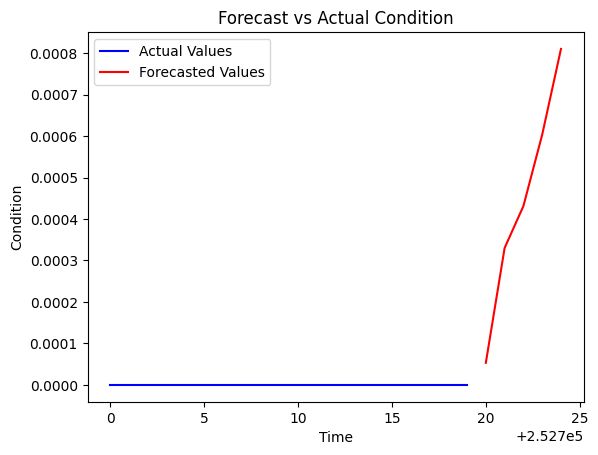

In [30]:
import matplotlib.pyplot as plt

# Ensure forecast is a DataFrame (if not already)
forecast_df = pd.DataFrame(forecast, columns=df2_clean.columns)

# Create x-values for the plot
x_actual = range(len(df2_clean) - 20, len(df2_clean))  # Last 20 actual data points
x_forecast = range(len(df2_clean), len(df2_clean) + 5)  # Forecasted next 5 points

# Plot actual values (last 20 points) for 'condition'
plt.plot(x_actual, df2_clean['condition'].iloc[-20:], label="Actual Values", color='blue')

# Plot forecasted values for the next 5 steps
plt.plot(x_forecast, forecast_df['condition'], label="Forecasted Values", color='red')

plt.xlabel('Time')
plt.ylabel('Condition')
plt.title('Forecast vs Actual Condition')
plt.legend()
plt.show()

In [31]:
print(df2_clean['condition'].iloc[-20:])
print(forecast_df['condition'])

306940    0
306941    0
306942    0
306943    0
306944    0
306945    0
306946    0
306947    0
306948    0
306949    0
306950    0
306951    0
306952    0
306953    0
306954    0
306955    0
306956    0
306957    0
306958    0
306959    0
Name: condition, dtype: int64
0    0.000053
1    0.000330
2    0.000431
3    0.000603
4    0.000810
Name: condition, dtype: float64
